In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install git+https://github.com/pbloem/kgbench-loader.git


  Cloning https://github.com/pbloem/kgbench-loader.git to /tmp/pip-req-build-z0h9es_w
  Running command git clone --filter=blob:none --quiet https://github.com/pbloem/kgbench-loader.git /tmp/pip-req-build-z0h9es_w
  Resolved https://github.com/pbloem/kgbench-loader.git to commit 320e614c6df0fee0ab8806b40b1770b7fa1f4ca8
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 18.2 MB/s eta 0:00:00
  Created wheel for kgbench: filename=kgbench-0.2-py3-none-any.whl size=14130 sha256=68558575009bc2e8b0b052231e13cd7e9d9b021ff075dcd5a902bdc621bd5715
  Stored in directory: /tmp/pip-ephem-wheel-cache-swt0tib2/wheels/2f/0a/92/a69d7eeae6ebfcca1fb8a15f654543f3be94bfd3393ff36ff7
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0fdce91f172555ed50368e21bf884b382ace5

In [2]:
import kgbench as kg

# Load the 'amplus' dataset with numpy arrays and train/validation split
data = kg.load('amplus')

# If you prefer PyTorch tensors
# data = kg.load('amplus', torch=True)

# For train/test split
# data = kg.load('amplus', final=True)

# Verify the dataset
print(f'Number of entities: {data.num_entities}')
print(f'Number of relations: {data.num_relations}')
print(f'Number of classes: {data.num_classes}')


loaded data amplus (47.47s).
Number of entities: 1153679
Number of relations: 33
Number of classes: 8


In [3]:
!pip install torch
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:0000:01


In [4]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
print(dir(data))  # List all available attributes


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_datatypes', '_dt_g2l', '_dt_l2g', 'datatype_g2l', 'datatype_l2g', 'datatypes', 'dgl', 'e2i', 'final', 'get_images', 'get_images_batch', 'get_strings', 'get_strings_batch', 'i2e', 'i2r', 'name', 'num_classes', 'num_entities', 'num_relations', 'pyg', 'r2i', 'torch', 'training', 'triples', 'withheld']


First 5 entity texts:
Entity 0: 
Entity 1: 
Entity 2: sokkel in dep 3 kast 25
Entity 3: (1534-1603)
Entity 4: (4 talen)


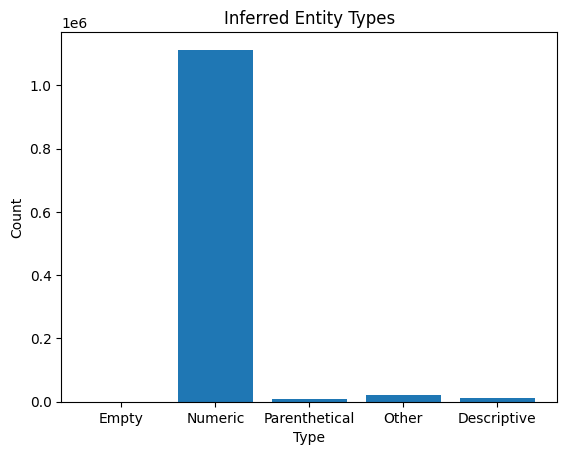

Using device: cuda
Epoch 10, Loss: 0.4565, Train Accuracy: 0.9642, Test Accuracy: 0.9644
Epoch 20, Loss: 0.2554, Train Accuracy: 0.9642, Test Accuracy: 0.9644
Epoch 30, Loss: 0.2361, Train Accuracy: 0.9642, Test Accuracy: 0.9645
Epoch 40, Loss: 0.2193, Train Accuracy: 0.9642, Test Accuracy: 0.9645
Epoch 50, Loss: 0.2005, Train Accuracy: 0.9642, Test Accuracy: 0.9645
Epoch 60, Loss: 0.1886, Train Accuracy: 0.9642, Test Accuracy: 0.9645
Epoch 70, Loss: 0.1748, Train Accuracy: 0.9642, Test Accuracy: 0.9645
Epoch 80, Loss: 0.1610, Train Accuracy: 0.9645, Test Accuracy: 0.9647
Epoch 90, Loss: 0.1472, Train Accuracy: 0.9648, Test Accuracy: 0.9650
Epoch 100, Loss: 0.1343, Train Accuracy: 0.9772, Test Accuracy: 0.9770
Epoch 110, Loss: 0.1230, Train Accuracy: 0.9774, Test Accuracy: 0.9771
Epoch 120, Loss: 0.1140, Train Accuracy: 0.9774, Test Accuracy: 0.9771
Epoch 130, Loss: 0.1073, Train Accuracy: 0.9853, Test Accuracy: 0.9918
Epoch 140, Loss: 0.1017, Train Accuracy: 0.9922, Test Accuracy: 0.9

In [7]:
# Standard library imports
from collections import defaultdict

# Third-party library imports
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv  # Ensure this is imported
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Step 1: Inspect and tokenize the textual information
entity_texts = [entity[0].strip() for entity in data.i2e]  # Remove leading/trailing whitespace
print("First 5 entity texts:")
for i in range(min(5, len(entity_texts))):
    print(f"Entity {i}: {entity_texts[i]}")

# Step 2: Infer entity types based on patterns
def infer_entity_type(text):
    if not text:  # Empty string
        return "Empty"
    elif "(" in text and ")" in text:  # Contains parentheses (e.g., dates or descriptions)
        return "Parenthetical"
    elif any(char.isdigit() for char in text):  # Contains numbers
        return "Numeric"
    elif len(text.split()) > 5:  # Long descriptive text
        return "Descriptive"
    else:
        return "Other"

# Categorize entities
entity_types = [infer_entity_type(text) for text in entity_texts]

# Step 3: Plot the distribution of inferred entity types
type_counts = defaultdict(int)
for entity_type in entity_types:
    type_counts[entity_type] += 1

# Convert to lists for plotting
types, counts = zip(*type_counts.items())

plt.bar(types, counts)
plt.title('Inferred Entity Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Step 4: Prepare edge index and node features
edge_index = torch.tensor([[triple[0] for triple in data.triples], 
                           [triple[2] for triple in data.triples]], dtype=torch.long)

# Create node features (one-hot encoding based on inferred types)
unique_types = list(set(entity_types))
type_to_idx = {type_: idx for idx, type_ in enumerate(unique_types)}
node_features = F.one_hot(torch.tensor([type_to_idx[type_] for type_ in entity_types]), num_classes=len(unique_types)).float()

# Labels for node classification
labels = torch.tensor([type_to_idx[type_] for type_ in entity_types])

# Train/test split
train_idx, test_idx = train_test_split(range(data.num_entities), test_size=0.2, random_state=42)
train_mask = torch.zeros(data.num_entities, dtype=torch.bool)
test_mask = torch.zeros(data.num_entities, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

# Create PyTorch Geometric Data object
graph_data = Data(x=node_features, edge_index=edge_index, y=labels, train_mask=train_mask, test_mask=test_mask)

# Check if GPU is available and move data to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

graph_data = graph_data.to(device)

# Step 5: Implement and train the GNN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(len(unique_types), 16)  # Input size matches one-hot encoding
        self.conv2 = GCNConv(16, len(unique_types))

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
model = GCN().to(device)  # Move model to GPU
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.NLLLoss()

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out[graph_data.train_mask], graph_data.y[graph_data.train_mask])
    loss.backward()
    optimizer.step()
    
    # Calculate training accuracy
    pred = out.argmax(dim=1)
    correct = (pred[graph_data.train_mask] == graph_data.y[graph_data.train_mask]).sum()
    train_acc = int(correct) / int(graph_data.train_mask.sum())
    
    return loss.item(), train_acc

# Testing function 
def test():
    model.eval()
    logits = model(graph_data.x, graph_data.edge_index)
    pred = logits.argmax(dim=1)
    correct = (pred[graph_data.test_mask] == graph_data.y[graph_data.test_mask]).sum()
    acc = int(correct) / int(graph_data.test_mask.sum())
    return acc

# Train the model
for epoch in range(1, 241):
    loss, train_acc = train()  # Get both loss and training accuracy
    if epoch % 10 == 0:
        test_acc = test()  # Compute test accuracy
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

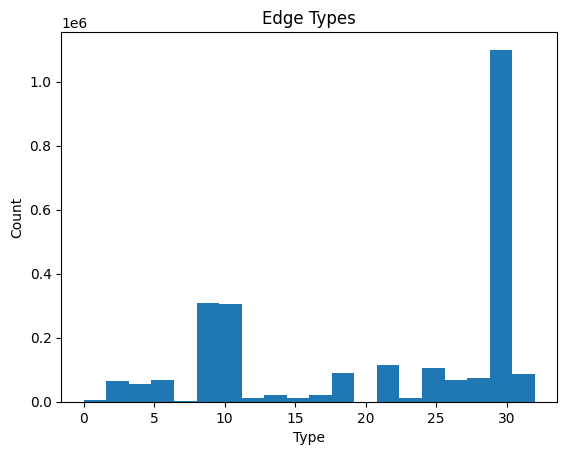

In [11]:
edge_types = [triple[1] for triple in data.triples]
plt.hist(edge_types, bins=20)
plt.title('Edge Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()